# Load Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt

# Load the data

In [3]:
pdday1=pd.read_csv("Cohort1Day1Data.csv", header=2)
pdday2=pd.read_csv("Cohort1Day2Data.csv")


In [4]:
pdday1

,Batch,Odor,Day,FlyIDConstant,Flynum,Concentration,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,1,Off,1,Yes,1,0.39,0.496788,0.526369,0.535363
1,1,Off,1,Yes,2,0.39,0.514989,0.446247,0.143418
2,1,Off,1,Yes,3,0.39,0.770878,0.514199,0.719057
3,1,Off,1,Yes,4,0.39,0.489293,0.600406,0.640472
4,1,Off,1,Yes,5,0.39,0.464668,0.493915,0.588409
...,...,...,...,...,...,...,...,...,...
115,4,On,1,Yes,11,0.39,0.459360,0.465596,0.501157
116,4,On,1,Yes,12,0.39,0.502463,0.494266,0.443287
117,4,On,1,Yes,13,0.39,0.806650,0.930046,0.856481
118,4,On,1,Yes,14,0.39,0.651478,0.266055,0.196759


In [5]:
def load_odorcsv(filename):
    print(filename)
    pdfile=pd.read_csv(filename, header=2)

    pdfile.rename(columns={'Unnamed: 6':'1','Unnamed: 7':'2','Unnamed: 8':'3'}, inplace=True)
    return pd.melt(pdfile, id_vars=['Batch', 'Odor', 'Day', "Flynum", "FlyIDConstant", "Concentration"], value_vars=['1', '2', '3'], var_name='Trial', value_name='Occupancy')

In [6]:
data_all=pd.concat([load_odorcsv("Cohort1Day1Data.csv"), load_odorcsv("Cohort1Day2Data.csv")])

Cohort1Day1Data.csv
Cohort1Day2Data.csv


In [7]:
droptrials=pd.DataFrame({'Day':[1,1,1,1,1,2], 'Batch':[2,2,3,3,4,3], 'Flynum':[12,9,9,12,13,5], "Discard":[True,True,True,True,True,True]} )
droptrials

,Day,Batch,Flynum,Discard
0,1,2,12,True
1,1,2,9,True
2,1,3,9,True
3,1,3,12,True
4,1,4,13,True
5,2,3,5,True


In [8]:
#find columns where droptrials matches data_all
data_all_filtered=pd.merge(data_all, droptrials, on=['Day', 'Batch', 'Flynum'], how='outer',indicator=True)
data_all_filtered=data_all_filtered[data_all_filtered._merge=='left_only']
data_all=data_all_filtered.drop(['_merge', 'Discard'], axis=1)

In [9]:
data_all

,Batch,Odor,Day,Flynum,FlyIDConstant,Concentration,Trial,Occupancy
0,1,Off,1,1,Yes,0.39,1,0.496788
1,1,On,1,1,Yes,0.39,1,0.865291
2,1,Off,1,1,Yes,0.39,2,0.526369
3,1,On,1,1,Yes,0.39,2,0.942353
4,1,Off,1,1,Yes,0.39,3,0.535363
...,...,...,...,...,...,...,...,...
715,4,On,2,15,Yes,0.39,1,0.343434
716,4,Off,2,15,Yes,0.39,2,0.252721
717,4,On,2,15,Yes,0.39,2,0.461646
718,4,Off,2,15,Yes,0.39,3,0.046192


In [10]:
data_all["Hours"]=((data_all["Day"]-1)*24)+(data_all["Trial"].astype(int)-1)*2
data_all["flyid"]=pd.Categorical(data_all["Batch"].astype(str)+"-"+data_all["Flynum"].astype(str))
data_all

,Batch,Odor,Day,Flynum,FlyIDConstant,Concentration,Trial,Occupancy,Hours,flyid
0,1,Off,1,1,Yes,0.39,1,0.496788,0,1-1
1,1,On,1,1,Yes,0.39,1,0.865291,0,1-1
2,1,Off,1,1,Yes,0.39,2,0.526369,2,1-1
3,1,On,1,1,Yes,0.39,2,0.942353,2,1-1
4,1,Off,1,1,Yes,0.39,3,0.535363,4,1-1
...,...,...,...,...,...,...,...,...,...,...
715,4,On,2,15,Yes,0.39,1,0.343434,24,4-15
716,4,Off,2,15,Yes,0.39,2,0.252721,26,4-15
717,4,On,2,15,Yes,0.39,2,0.461646,26,4-15
718,4,Off,2,15,Yes,0.39,3,0.046192,28,4-15


In [11]:
data_minimal=data_all[data_all["Odor"]=="On"][["Hours", "Occupancy", "flyid"]]
data_minimal["flyid"]=pd.Categorical(data_minimal["flyid"])

In [12]:
# plot the occupancy for each combination of batch and flynum

In [47]:
# plot1=so.Plot(data=data_all, x='Hours', y="Occupancy", color="flyid", linestyle="Odor", group="flyid")
# plot1

<Axes: xlabel='Occupancy', ylabel='Density'>

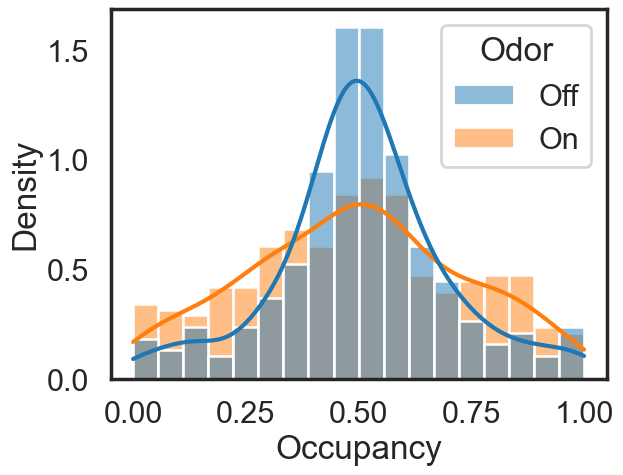

In [14]:
sns.set_context("poster")
sns.set_style("white")
sns.kdeplot(data_all, x="Occupancy", hue="Odor", fill=False, clip=[0,1])
sns.histplot(data_all, x="Occupancy", hue="Odor",stat="density")

/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


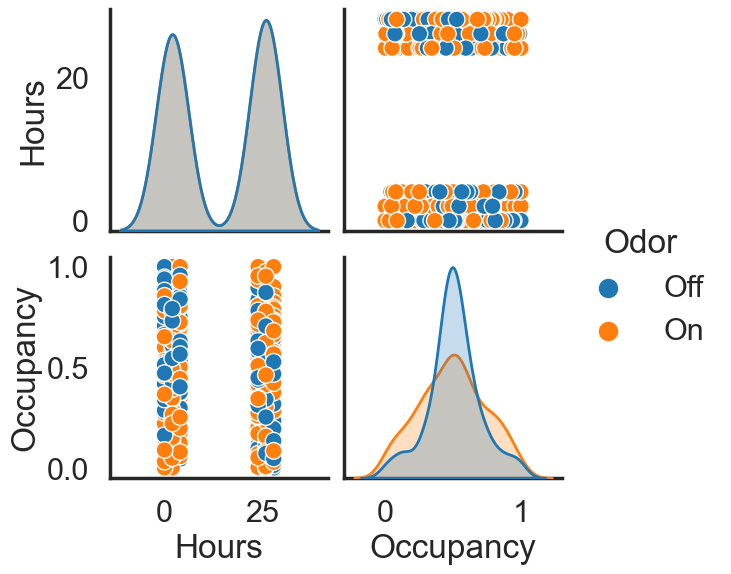

In [15]:
sns.pairplot(data_all, hue="Odor", vars=["Hours", "Occupancy"], diag_kind="kde", size=3)

In [16]:
from sklearn import linear_model


In [17]:
#Create a linear model of occupancy vs time for each fly
# Create linear regression object
regr = linear_model.LinearRegression()


In [18]:
data_minimal.pivot(index="flyid", columns="Hours", values="Occupancy")

Hours,0,2,4,24,26,28
flyid,,,,,,
1-1,0.865291,0.942353,0.941309,0.845070,0.878151,0.856946
1-10,0.145631,0.769412,0.744921,0.581690,0.560224,0.900963
1-11,0.387136,0.427059,0.354402,0.345070,0.330532,0.360385
1-12,0.813107,0.600000,0.504515,0.604225,0.600840,0.568088
1-13,0.180825,0.450588,0.172686,0.660563,0.180672,0.185695
1-14,0.223301,0.529412,0.396163,1.000000,0.362745,0.247593
1-15,0.790049,1.000000,0.124153,0.597183,0.015406,0.854195
1-2,0.106796,0.883529,0.726862,0.936620,0.864146,0.885832
1-3,0.303398,0.525882,0.866817,0.618310,0.850140,0.800550


In [19]:
data_minimal

,Hours,Occupancy,flyid
1,0,0.865291,1-1
3,2,0.942353,1-1
5,4,0.941309,1-1
7,0,0.106796,1-2
9,2,0.883529,1-2
...,...,...,...
711,26,0.952580,4-14
713,28,0.680516,4-14
715,24,0.343434,4-15
717,26,0.461646,4-15


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/seaborn/_core/plot.py:941: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.savefig(buffer, dpi=dpi * 2, format="png", bbox_inches="tight")


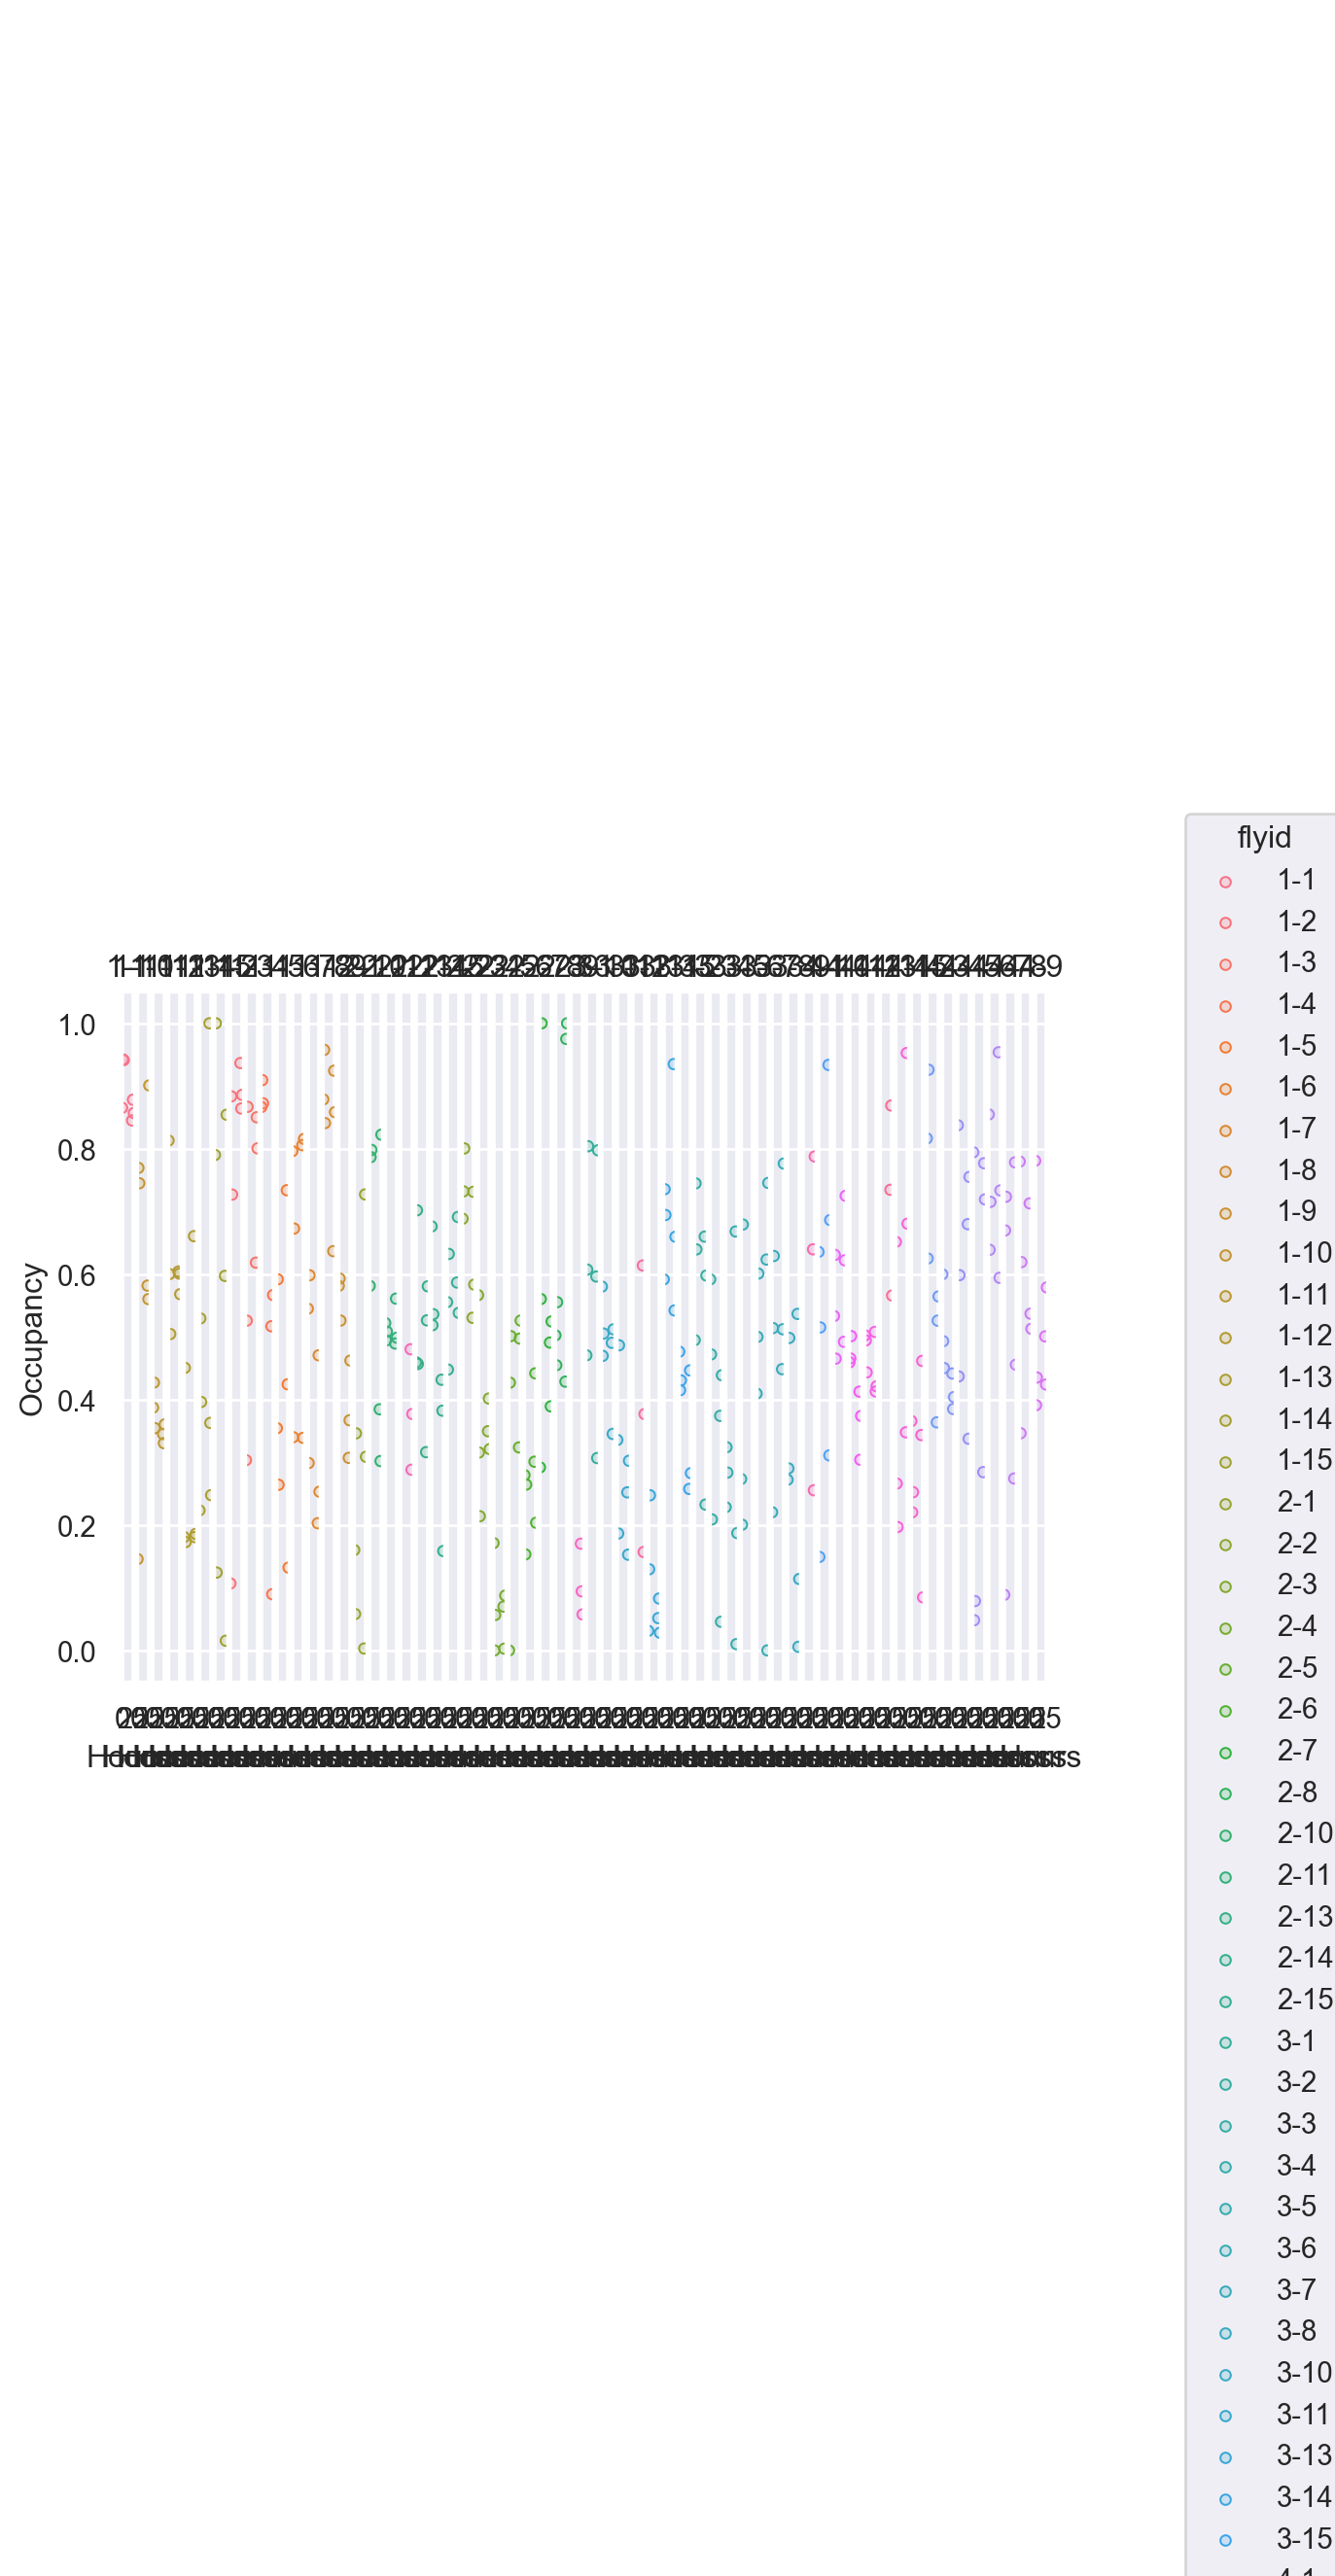

In [48]:
so.Plot(data=data_minimal, x='Hours', y="Occupancy", color="flyid").add(so.Dots(), so.Agg()).facet(col="flyid")

In [21]:
import numpy as np
import statsmodels.api as sm
from scipy import stats
from matplotlib import pyplot as plt

plt.rc("figure", figsize=(16,8))
plt.rc("font", size=14)

In [22]:
data_minimal

,Hours,Occupancy,flyid
1,0,0.865291,1-1
3,2,0.942353,1-1
5,4,0.941309,1-1
7,0,0.106796,1-2
9,2,0.883529,1-2
...,...,...,...
711,26,0.952580,4-14
713,28,0.680516,4-14
715,24,0.343434,4-15
717,26,0.461646,4-15


In [23]:
# calculate the linear regression for each fly
#pivot data_minimal to get a column for each hour

data_minimal_pivot=data_minimal.pivot(index="flyid", columns="Hours", values="Occupancy")
data_minimal_pivot

Hours,0,2,4,24,26,28
flyid,,,,,,
1-1,0.865291,0.942353,0.941309,0.845070,0.878151,0.856946
1-10,0.145631,0.769412,0.744921,0.581690,0.560224,0.900963
1-11,0.387136,0.427059,0.354402,0.345070,0.330532,0.360385
1-12,0.813107,0.600000,0.504515,0.604225,0.600840,0.568088
1-13,0.180825,0.450588,0.172686,0.660563,0.180672,0.185695
1-14,0.223301,0.529412,0.396163,1.000000,0.362745,0.247593
1-15,0.790049,1.000000,0.124153,0.597183,0.015406,0.854195
1-2,0.106796,0.883529,0.726862,0.936620,0.864146,0.885832
1-3,0.303398,0.525882,0.866817,0.618310,0.850140,0.800550


Text(0.5, 1.0, 'Correlation between occupancy at different times')

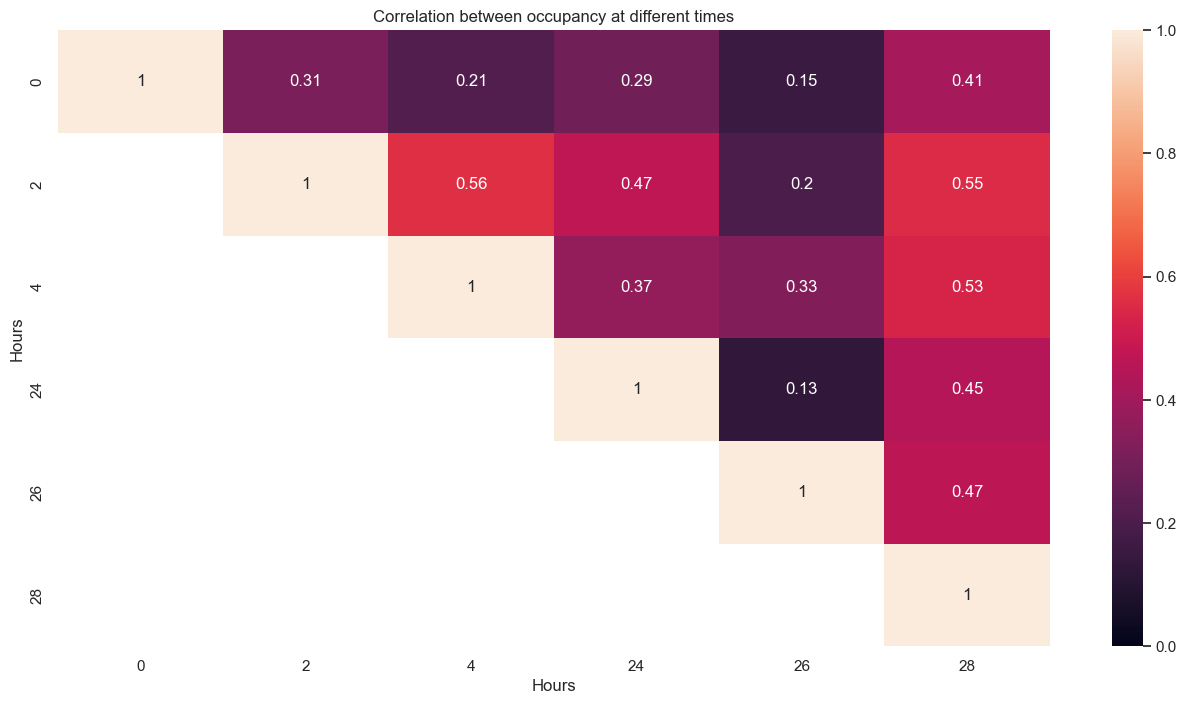

In [24]:
sns.set_theme(style="white")
corr=data_minimal_pivot.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(data_minimal_pivot.corr(), mask=~mask, vmin=0, vmax=1, annot=True)
plt.title("Correlation between occupancy at different times")

In [49]:
data_minimal_pivot

Hours,0,2,4,24,26,28
flyid,,,,,,
1-1,0.865291,0.942353,0.941309,0.845070,0.878151,0.856946
1-10,0.145631,0.769412,0.744921,0.581690,0.560224,0.900963
1-11,0.387136,0.427059,0.354402,0.345070,0.330532,0.360385
1-12,0.813107,0.600000,0.504515,0.604225,0.600840,0.568088
1-13,0.180825,0.450588,0.172686,0.660563,0.180672,0.185695
1-14,0.223301,0.529412,0.396163,1.000000,0.362745,0.247593
1-15,0.790049,1.000000,0.124153,0.597183,0.015406,0.854195
1-2,0.106796,0.883529,0.726862,0.936620,0.864146,0.885832
1-3,0.303398,0.525882,0.866817,0.618310,0.850140,0.800550


Text(0.5, 1.0, 'Correlation between occupancy at different times')

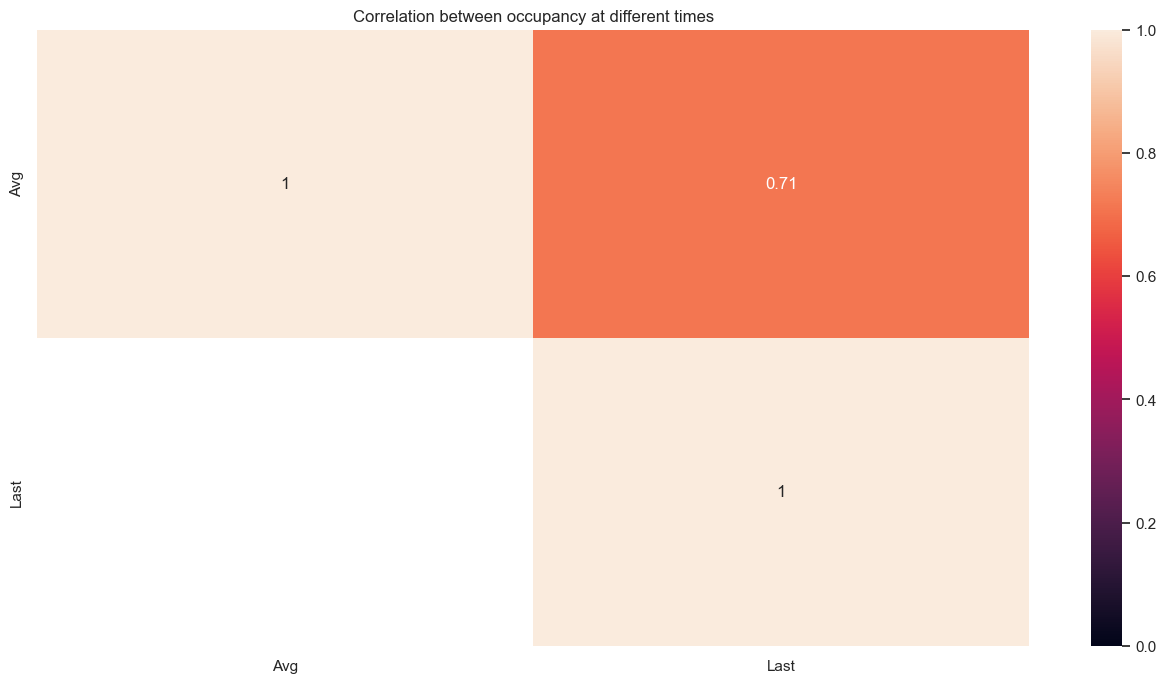

In [25]:
traintest=data_minimal_pivot.groupby(["Avg","Avg","Avg","Avg","Avg","Last"], axis=1).mean()
daycorr=traintest.corr()
mask = np.triu(np.ones_like(daycorr, dtype=bool))

sns.heatmap(daycorr, mask=~mask, vmin=0, vmax=1, annot=True)
plt.title("Correlation between occupancy at different times")

Text(0, 0.5, 'Occupancy at 28 hours')

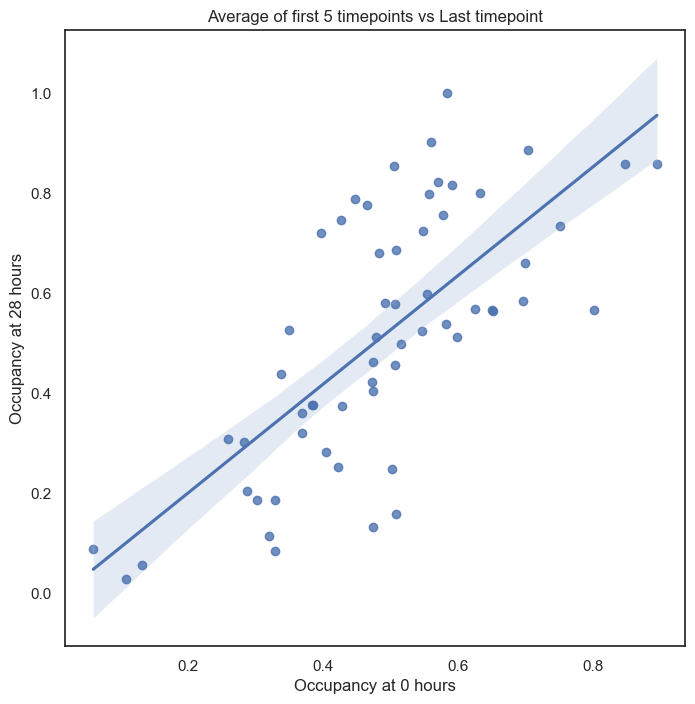

In [26]:
fig, ax = plt.subplots(figsize=(8,8))
sns.regplot(data=traintest, x="Avg", y="Last", label="Last")
plt.title("Average of first 5 timepoints vs Last timepoint")
plt.xlabel("Occupancy at 0 hours")
plt.ylabel("Occupancy at 28 hours")

In [27]:
traintest

,Avg,Last
flyid,,
1-1,0.894435,0.856946
1-10,0.560376,0.900963
1-11,0.368840,0.360385
1-12,0.624537,0.568088
1-13,0.329067,0.185695
1-14,0.502324,0.247593
1-15,0.505358,0.854195
1-2,0.703591,0.885832
1-3,0.632909,0.800550


In [28]:
data_minimal_pivot[[0,28]]

Hours,0,28
flyid,,
1-1,0.865291,0.856946
1-10,0.145631,0.900963
1-11,0.387136,0.360385
1-12,0.813107,0.568088
1-13,0.180825,0.185695
1-14,0.223301,0.247593
1-15,0.790049,0.854195
1-2,0.106796,0.885832
1-3,0.303398,0.800550


Text(0, 0.5, 'Occupancy at 28 hours')

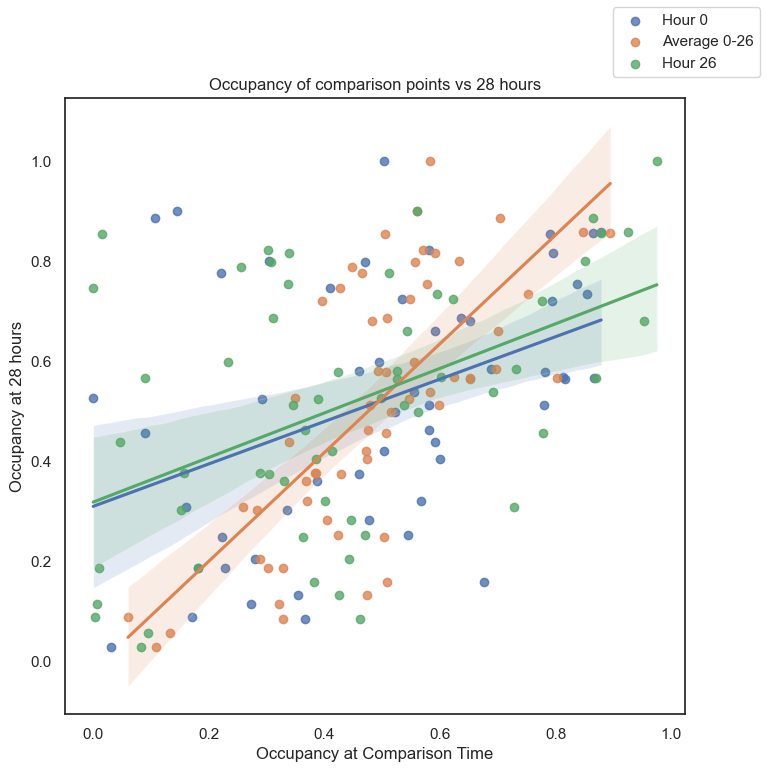

In [29]:
#set figure to be square
fig, ax = plt.subplots(figsize=(8,8))
sns.set_context("notebook")
sns.regplot(x=data_minimal_pivot[[0]],y=data_minimal_pivot[[28]], label="Hour 0")

sns.regplot(data=traintest, x="Avg", y="Last", label="Average 0-26")
sns.regplot(x=data_minimal_pivot[[26]],y=data_minimal_pivot[[28]], label="Hour 26")
fig.legend()
plt.title("Occupancy of comparison points vs 28 hours")

plt.xlabel("Occupancy at Comparison Time")
plt.ylabel("Occupancy at 28 hours")

Text(0, 0.5, 'Occupancy at 28 hours')

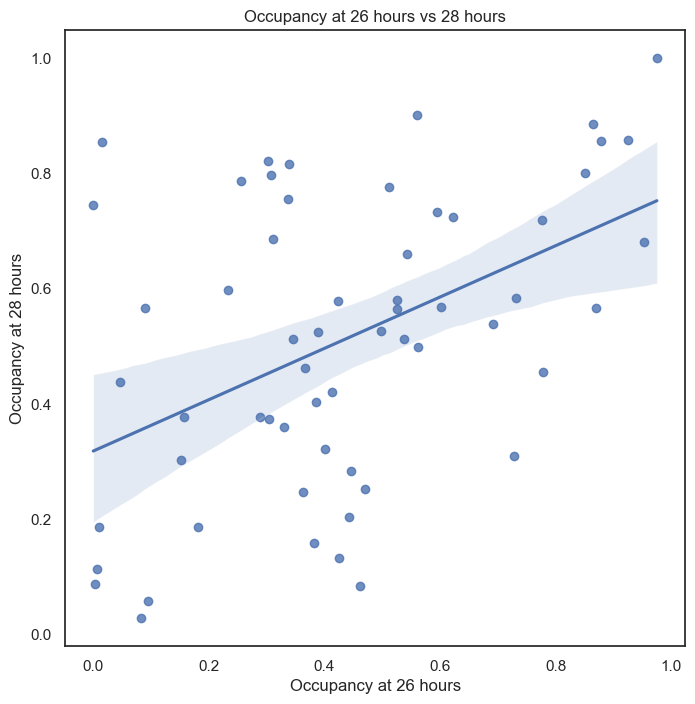

In [30]:
#set figure to be square
fig, ax = plt.subplots(figsize=(8,8))
sns.regplot(x=data_minimal_pivot[[26]],y=data_minimal_pivot[[28]])
plt.title("Occupancy at 26 hours vs 28 hours")
plt.xlabel("Occupancy at 26 hours")
plt.ylabel("Occupancy at 28 hours")

Text(0.5, 1.0, 'Correlation between occupancy at different times')

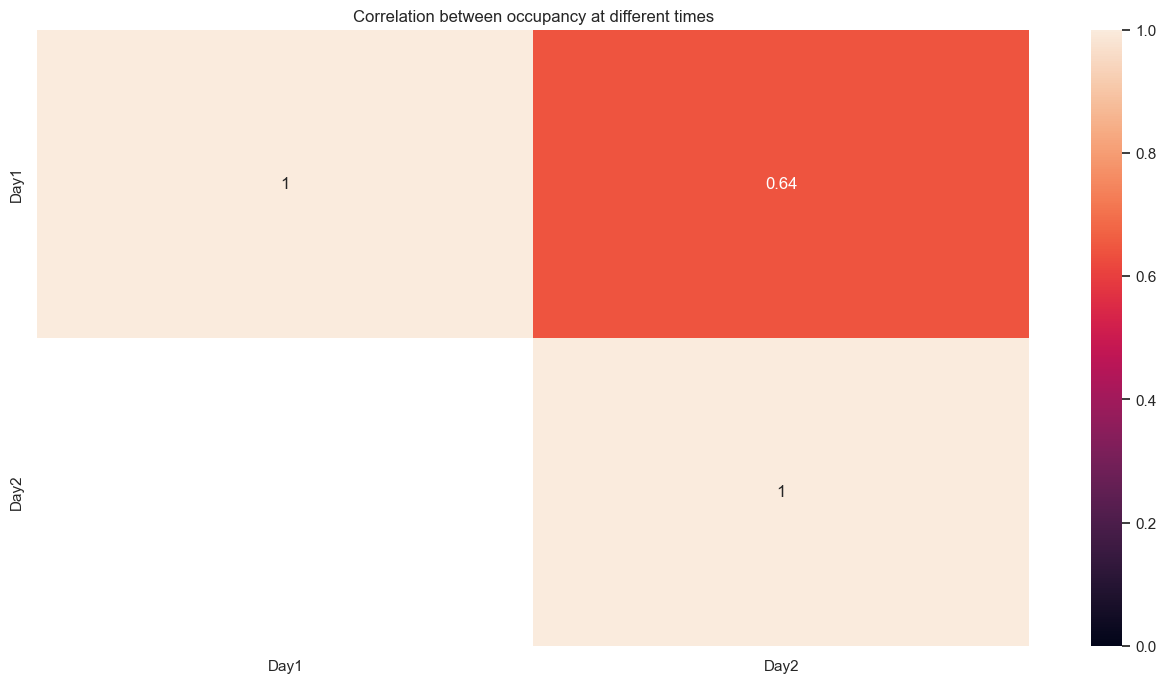

In [31]:
dayaverages=data_minimal_pivot.groupby(["Day1","Day1","Day1","Day2","Day2","Day2"], axis=1).mean()
daycorr=dayaverages.corr()
mask = np.triu(np.ones_like(daycorr, dtype=bool))

sns.heatmap(daycorr, mask=~mask, vmin=0, vmax=1, annot=True)
plt.title("Correlation between occupancy at different times")

In [32]:
orderaverages=data_minimal_pivot.groupby(["T1","T2","T3","T1","T2","T3"], axis=1).mean()
# daycorr=dayaverages.corr()

In [33]:
data_minimal_pivot_plus=pd.concat([data_minimal_pivot, dayaverages, orderaverages], axis=1)
data_minimal_pivot_plus

,0,2,4,24,26,28,Day1,Day2,T1,T2,T3
flyid,,,,,,,,,,,
1-1,0.865291,0.942353,0.941309,0.845070,0.878151,0.856946,0.916318,0.860056,0.855181,0.910252,0.899128
1-10,0.145631,0.769412,0.744921,0.581690,0.560224,0.900963,0.553321,0.680959,0.363661,0.664818,0.822942
1-11,0.387136,0.427059,0.354402,0.345070,0.330532,0.360385,0.389532,0.345329,0.366103,0.378796,0.357393
1-12,0.813107,0.600000,0.504515,0.604225,0.600840,0.568088,0.639207,0.591051,0.708666,0.600420,0.536301
1-13,0.180825,0.450588,0.172686,0.660563,0.180672,0.185695,0.268033,0.342310,0.420694,0.315630,0.179190
1-14,0.223301,0.529412,0.396163,1.000000,0.362745,0.247593,0.382958,0.536779,0.611650,0.446078,0.321878
1-15,0.790049,1.000000,0.124153,0.597183,0.015406,0.854195,0.638067,0.488928,0.693616,0.507703,0.489174
1-2,0.106796,0.883529,0.726862,0.936620,0.864146,0.885832,0.572396,0.895533,0.521708,0.873838,0.806347
1-3,0.303398,0.525882,0.866817,0.618310,0.850140,0.800550,0.565366,0.756333,0.460854,0.688011,0.833684


In [34]:
data_cummean=data_minimal_pivot.cumsum(axis=1)*(1/np.arange(1,7))
# data_cummean.columns=["1","<2","<4","<24","<26","All"]
data_cummean
daycorr=data_minimal_pivot_plus.corr()
mask = np.triu(np.ones_like(daycorr, dtype=bool))
daycorr


,0,2,4,24,26,28,Day1,Day2,T1,T2,T3
0,1.000000,0.309348,0.213753,0.288883,0.154922,0.410581,0.679709,0.380585,0.819908,0.301996,0.351735
2,0.309348,1.000000,0.564505,0.472613,0.196207,0.551439,0.821445,0.540650,0.488551,0.754803,0.621890
4,0.213753,0.564505,1.000000,0.367427,0.326679,0.532531,0.773510,0.549968,0.346862,0.554327,0.865459
24,0.288883,0.472613,0.367427,1.000000,0.131086,0.448834,0.493306,0.668395,0.803605,0.365796,0.477816
26,0.154922,0.196207,0.326679,0.131086,1.000000,0.465601,0.295213,0.734035,0.194249,0.821592,0.459121
28,0.410581,0.551439,0.532531,0.448834,0.465601,1.000000,0.653210,0.851648,0.539767,0.625903,0.896456
Day1,0.679709,0.821445,0.773510,0.493306,0.295213,0.653210,1.000000,0.642476,0.734133,0.705976,0.803431
Day2,0.380585,0.540650,0.549968,0.668395,0.734035,0.851648,0.642476,1.000000,0.659749,0.817141,0.813631
T1,0.819908,0.488551,0.346862,0.803605,0.194249,0.539767,0.734133,0.659749,1.000000,0.423174,0.509902
T2,0.301996,0.754803,0.554327,0.365796,0.821592,0.625903,0.705976,0.817141,0.423174,1.000000,0.646106


In [35]:
# mask[0:3, 6]=False
# mask[3:6, 7]=False
# mask[[0,3], 8]=False
# mask[[1,4], 9]=False
# mask[[2,5], 10]=False

mask[6,0:3]=True
mask[7, 3:6]=True
mask[8, [0,3]]=True
mask[9, [1,4]]=True
mask[10, [2,5]]=True

Text(0.5, 1.0, 'Correlation between occupancy at different times')

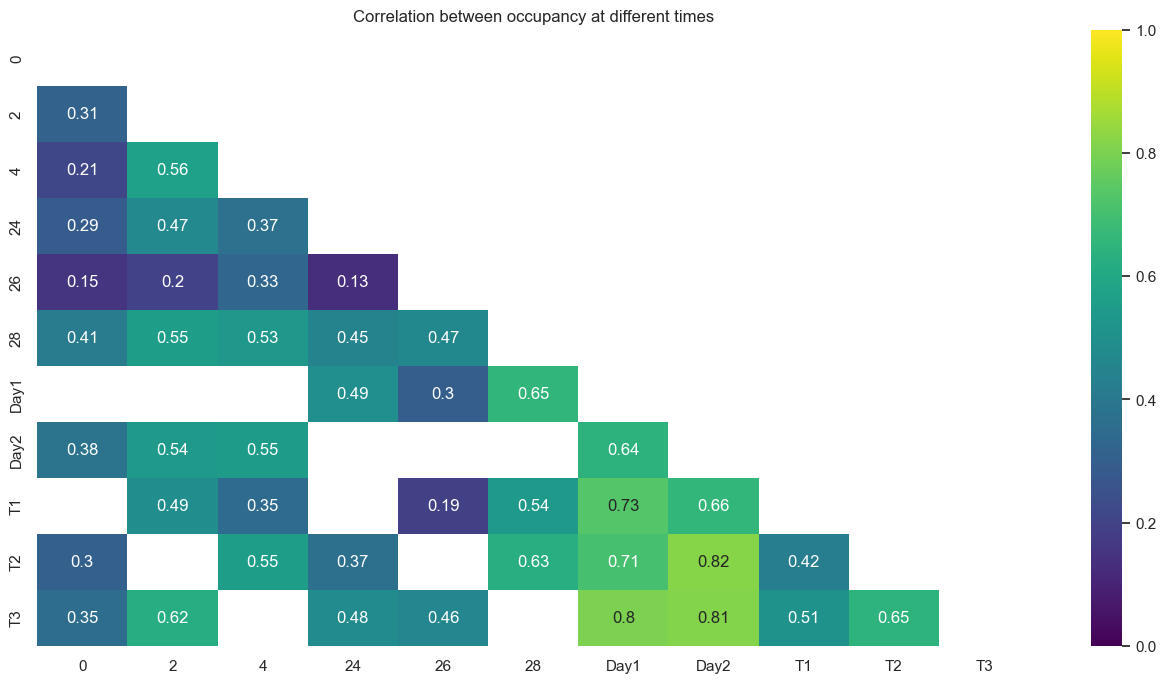

In [36]:

sns.heatmap(daycorr, mask=mask, vmin=0, vmax=1, annot=True, cmap="viridis")
plt.title("Correlation between occupancy at different times")

In [37]:
# calculate correlation between each hour and the first hour
for i in data_minimal_pivot.columns:
    print(i, np.corrcoef(data_minimal_pivot[0], data_minimal_pivot[i])[0,1])


0 nan
2 nan
4 nan
24 nan
26 nan
28 nan


In [39]:
# sm.OLS(data_minimal["Occupancy"].values, data_minimal[["Hours", "flyid"]].values).fit().summary()

In [40]:
# fit a linear model for each fly, using flyid as a categorical variable and hours as a continous variable
# plot the residuals for each fly
model=

SyntaxError: invalid syntax (3268502422.py, line 3)

In [41]:
# # from sklearn.linear_model import TweedieRegressor
# # reg = TweedieRegressor(power=1, alpha=0.5, link='log')
# # reg.fit([[0, 0], [0, 1], [2, 2]], [0, 1, 2])
# # TweedieRegressor(alpha=0.5, link='log', power=1)

# from sklearn.linear_model import TweedieRegressor
# reg = TweedieRegressor(power=1, alpha=0.5, link='log')
# reg.fit(data_minimal[["Hours", "flyid"]], data_minimal[["Occupancy"]])
# TweedieRegressor(alpha=0.5, link='log', power=1)


In [42]:
reg.coef_


NameError: name 'reg' is not defined

In [43]:

reg.intercept_


NameError: name 'reg' is not defined

In [44]:
from resample.bootstrap import bootstrap
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

def fitreg(A):
    scale = StandardScaler()
    reg = LinearRegression(fit_intercept=True)
    X_scale = scale.fit_transform(A[:, :A.shape[1]-2])
    y = A[:, A.shape[1]-1]
    reg.fit(X_scale, y)
    return {"coef": reg.coef_, "intercept": reg.intercept_}


In [45]:
pd.get_dummies(data_minimal["flyid"])
dummyminimal=pd.concat([data_minimal[["Hours", "Occupancy"]], pd.get_dummies(data_minimal["flyid"])], axis=1)
dummyminimal

,Hours,Occupancy,1-1,1-10,1-11,1-12,1-13,1-14,1-15,1-2,...,4-14,4-15,4-2,4-3,4-4,4-5,4-6,4-7,4-8,4-9
1,0,0.865291,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0.942353,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0.941309,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0.106796,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,2,0.883529,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,26,0.952580,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
713,28,0.680516,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
715,24,0.343434,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
717,26,0.461646,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [46]:

boot_coef = bootstrap(a=df.join(y).values, f=fitreg, b=5000)

NameError: name 'df' is not defined

# Let's try STAN

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import re
import os
from cmdstanpy import cmdstan_path, CmdStanModel
import matplotlib.pyplot as plt